In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning and Preprocessing
class TextPreprocessor:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def transform(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in text.split() if word not in self.stopwords]
        return ' '.join(tokens)

# Load the dataset
data = pd.read_csv('/content/SAH-labeled-dataset-July-20-9-cls.csv')  # Update with your dataset file name

# Drop rows with missing values in the 'description' and 'Counterspeech' columns
data.dropna(subset=['description', 'Hatespeech'], inplace=True)

# Split the dataset into training and testing sets
text_train, text_test, counterspeech_train, counterspeech_test = train_test_split(
    data['description'],
    data['Hatespeech'],
    test_size=0.2,
    random_state=42
)

# Text Cleaning and Preprocessing
preprocessor = TextPreprocessor()
cleaned_text_train = [preprocessor.transform(text) for text in text_train]
cleaned_text_test = [preprocessor.transform(text) for text in text_test]

# Word Embedding using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(cleaned_text_train)
features_test = vectorizer.transform(cleaned_text_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)

# Predictions
predictions = rf_classifier.predict(features_test)

# Evaluation
print(classification_report(counterspeech_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       305
           1       0.65      0.47      0.54        66

    accuracy                           0.86       371
   macro avg       0.77      0.71      0.73       371
weighted avg       0.85      0.86      0.85       371



Adding Balanced Random Forest, since class 1 is comparatively very small, hence imbalanced.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       305
           1       0.53      0.76      0.62        66

    accuracy                           0.84       371
   macro avg       0.74      0.81      0.76       371
weighted avg       0.87      0.84      0.85       371



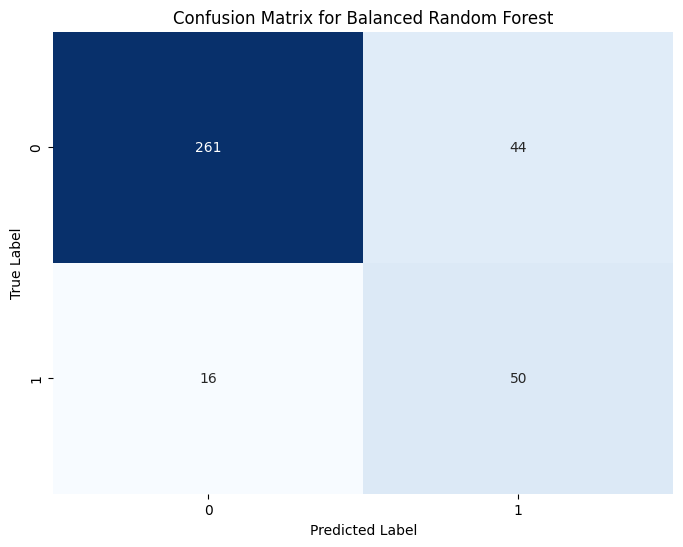

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier
# Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier()
brf_classifier.fit(features_train, counterspeech_train)

# Predictions
predictions = brf_classifier.predict(features_test)

# Evaluation
print(classification_report(counterspeech_test, predictions))

# Confusion Matrix
confusion = confusion_matrix(counterspeech_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Saving the ML model

In [21]:

# Save the trained BRF model to a file
model_filename = 'brf_classifier.joblib'
joblib.dump(brf_classifier, model_filename)
print(f"Trained BRF model saved as '{model_filename}'")

Trained BRF model saved as 'brf_classifier.joblib'


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import re




# Evaluation
print('Classification Report:')
print(classification_report(counterspeech_test, predictions))

print('Confusion Matrix:')
print(confusion_matrix(counterspeech_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       305
           1       0.65      0.47      0.54        66

    accuracy                           0.86       371
   macro avg       0.77      0.71      0.73       371
weighted avg       0.85      0.86      0.85       371

Confusion Matrix:
[[288  17]
 [ 35  31]]


There are 123 instances that were correctly classified as the negative class (true negatives).
There are 11 instances that were incorrectly classified as the positive class (false positives).
There are 33 instances that were incorrectly classified as the negative class (false negatives).
There are 204 instances that were correctly classified as the positive class (true positives).

In [18]:
#Adding other models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
from keras.models import Sequential
from keras.layers import Dense

# Convert target labels to one-hot encoding
num_classes = len(np.unique(counterspeech_train))
counterspeech_train_encoded = np.eye(num_classes)[counterspeech_train]
counterspeech_test_encoded = np.eye(num_classes)[counterspeech_test]

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
nn_model.add(Dense(num_classes, activation='softmax'))
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(features_train, counterspeech_train_encoded, epochs=10, batch_size=32, verbose=1)

# Predictions
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       305
           1       0.68      0.38      0.49        66

    accuracy                           0.86       371
   macro avg       0.78      0.67      0.70       371
weighted avg       0.84      0.86      0.84       371


Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       305
           1       0.62      0.42      0.50        66

    accuracy                           0.85       371
   macro avg       0.75      0.68      0.71       371
weighted avg       0.84      0.85      0.84       371


Epoch 1/10
47/47 [==============================] - 1s 4ms/step - loss: 0.5400 - accuracy: 0.8139
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8624
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2056 - ac

Running Confusion Matrix on all the models

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       305
           1       0.63      0.47      0.54        66

    accuracy                           0.86       371
   macro avg       0.76      0.71      0.73       371
weighted avg       0.85      0.86      0.85       371

Confusion Matrix:
[[287  18]
 [ 35  31]]


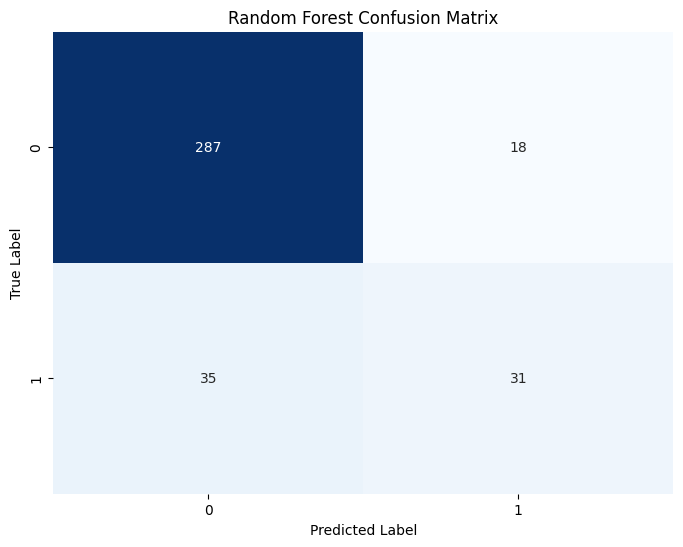

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       305
           1       0.68      0.38      0.49        66

    accuracy                           0.86       371
   macro avg       0.78      0.67      0.70       371
weighted avg       0.84      0.86      0.84       371

Confusion Matrix:
[[293  12]
 [ 41  25]]


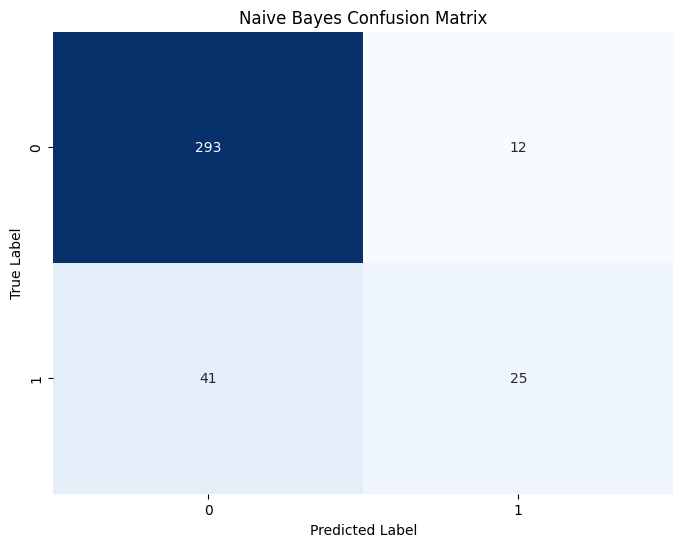

Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       305
           1       0.62      0.42      0.50        66

    accuracy                           0.85       371
   macro avg       0.75      0.68      0.71       371
weighted avg       0.84      0.85      0.84       371

Confusion Matrix:
[[288  17]
 [ 38  28]]


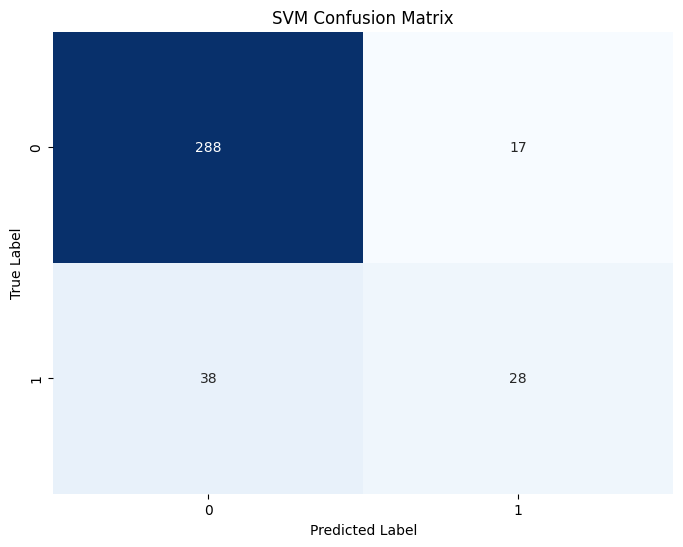

12/12 [==============================] - 0s 1ms/step
Neural Network (Multi-Layer Perceptron) Classifier:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       305
           1       0.62      0.52      0.56        66

    accuracy                           0.86       371
   macro avg       0.76      0.72      0.74       371
weighted avg       0.85      0.86      0.85       371

Confusion Matrix:
[[284  21]
 [ 32  34]]


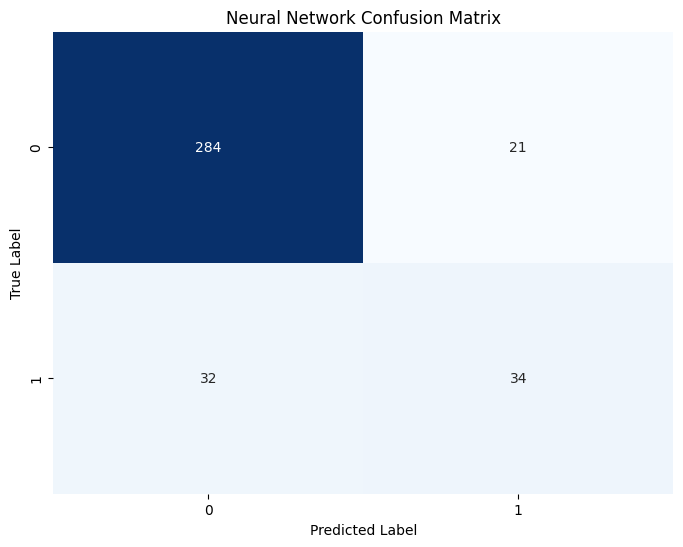

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features_train, counterspeech_train)
rf_predictions = rf_classifier.predict(features_test)

print("Random Forest Classifier:")
print(classification_report(counterspeech_test, rf_predictions))
print("Confusion Matrix:")
rf_cm = confusion_matrix(counterspeech_test, rf_predictions)
print(rf_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(features_train, counterspeech_train)
nb_predictions = nb_classifier.predict(features_test)

print("Naive Bayes Classifier:")
print(classification_report(counterspeech_test, nb_predictions))
print("Confusion Matrix:")
nb_cm = confusion_matrix(counterspeech_test, nb_predictions)
print(nb_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(features_train, counterspeech_train)
svm_predictions = svm_classifier.predict(features_test)

print("Support Vector Machine (SVM) Classifier:")
print(classification_report(counterspeech_test, svm_predictions))
print("Confusion Matrix:")
svm_cm = confusion_matrix(counterspeech_test, svm_predictions)
print(svm_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Neural Network (Multi-Layer Perceptron) Classifier using Keras
nn_predictions = np.argmax(nn_model.predict(features_test), axis=-1)

print("Neural Network (Multi-Layer Perceptron) Classifier:")
print(classification_report(counterspeech_test, nn_predictions))
print("Confusion Matrix:")
nn_cm = confusion_matrix(counterspeech_test, nn_predictions)
print(nn_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
